# Demo 7: Pruning

We usually use pruning to make neural networks sparser hence more efficient and more interpretable. KANs provide two ways of pruning: automatic pruning, and manual pruning.

## Automatic pruning

For each node, we consider it active if both of its max incoming l1 and outgoing l1 are above some threshold (see paper for details). Only active neurons will be kept, while inactive neurons are pruned away. Note that there is no automatic edge pruning, just to be safe (there are cases where important edges have small l1 norm). However, one can manually prune away nodes and edges.

description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

train loss: 1.57e-01 | test loss: 1.31e-01 | reg: 2.04e+01 : 100%|██| 20/20 [00:11<00:00,  1.82it/s]


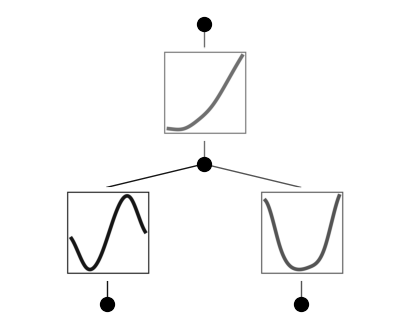

In [6]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);
model = model.prune()
# collect activations
model(dataset['train_input'])
model.plot()

Let's try to use different threshold, by default, threshold = 1e-2

threshold = 1e-4 leaves more hidden nodes.

description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

train loss: 1.56e-01 | test loss: 1.31e-01 | reg: 2.04e+01 : 100%|██| 20/20 [00:10<00:00,  1.85it/s]


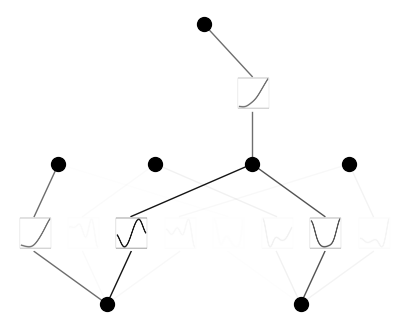

In [7]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);
model = model.prune(threshold=1e-4)
model(dataset['train_input'])
model.plot()

## Manual pruning

We can manually prune away nodes

In [9]:
model.remove_node(1,0)

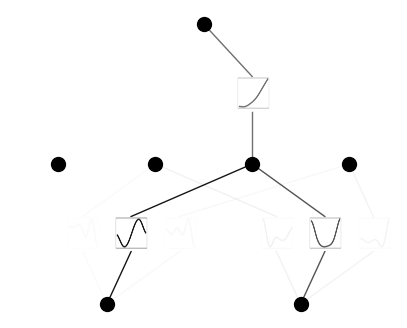

In [10]:
model.plot()

We can also manually remove edges

In [11]:
model.remove_edge(0,0,1)
model.remove_edge(0,0,3)
model.remove_edge(0,1,1)
model.remove_edge(0,1,3)

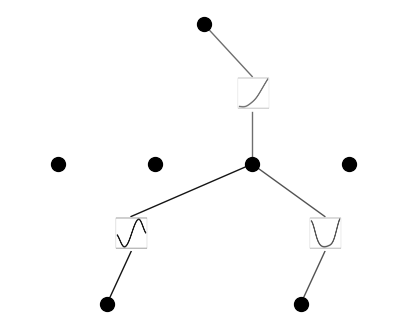

In [12]:
model.plot()

Use prune() if you don't want to see these inactive nodes in the hiddenl layer

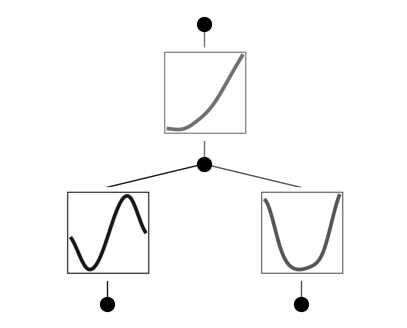

In [13]:
model = model.prune(mode='manual', active_neurons_id=[[0,1],[2],[0]]);
model(dataset['train_input'])
model.plot()